# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Normalization (Min Max Scaler)
from sklearn.preprocessing import MinMaxScaler

# Linear Regression
from sklearn.linear_model import LinearRegression

# Ridge Regression
from sklearn.linear_model import Ridge

# Lasso Regression
from sklearn.linear_model import Lasso

# Elastic Net Regression
from sklearn.linear_model import ElasticNet

# Orthogonal Matching Pursuit
from sklearn.linear_model import OrthogonalMatchingPursuit

# Generalized Linear Model (GLM) / Tweedie Regressor
from sklearn.linear_model import TweedieRegressor

# Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Support Vector Machines (SVM) for Regression
from sklearn.svm import SVR

# Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Multi-layer Perceptron
from sklearn.neural_network import MLPRegressor

# Membuat Input X

In [2]:
X = np.random.randint(20, size=(1000,7))
X = pd.DataFrame(X)
X.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7']
X

,x1,x2,x3,x4,x5,x6,x7
0,1,2,12,8,4,18,13
1,4,6,12,2,15,13,16
2,1,1,10,10,7,10,13
3,7,10,17,15,19,1,10
4,12,1,8,7,0,19,10
...,...,...,...,...,...,...,...
995,17,16,9,5,7,13,7
996,14,19,1,13,14,13,14
997,16,0,13,16,3,5,11
998,14,4,0,14,5,12,19


# Membuat Output y

In [3]:
y = 5*X['x1'] + 0.1*(X['x2']**2) + 30*(X['x3']**0.5) + X['x4']*X['x5'] + 50
#y = y + np.random.randint(50, size=(1000)) - 25
y

0      191.323048
1      207.523048
2      219.968330
3      503.693169
4      194.952814
          ...    
995    285.600000
996    368.100000
997    286.166538
998    191.600000
999    386.872539
Length: 1000, dtype: float64

# Normalization (Min Max Scaler)

In [4]:
scaler = MinMaxScaler()
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.columns = columns
X

,x1,x2,x3,x4,x5,x6,x7
0,0.052632,0.105263,0.631579,0.421053,0.210526,0.947368,0.684211
1,0.210526,0.315789,0.631579,0.105263,0.789474,0.684211,0.842105
2,0.052632,0.052632,0.526316,0.526316,0.368421,0.526316,0.684211
3,0.368421,0.526316,0.894737,0.789474,1.000000,0.052632,0.526316
4,0.631579,0.052632,0.421053,0.368421,0.000000,1.000000,0.526316
...,...,...,...,...,...,...,...
995,0.894737,0.842105,0.473684,0.263158,0.368421,0.684211,0.368421
996,0.736842,1.000000,0.052632,0.684211,0.736842,0.684211,0.736842
997,0.842105,0.000000,0.684211,0.842105,0.157895,0.263158,0.578947
998,0.736842,0.210526,0.000000,0.736842,0.263158,0.631579,1.000000


# Split Data

In [5]:
X_train = X.loc[0:799]

X_valid = X.loc[800:999]
X_valid.index = range(200)

y_train = y[0:800]

y_valid = y[800:1000]
y_valid.index = range(200)

print(X_train)
print(X_valid)
print(y_train)
print(y_valid)

           x1        x2        x3        x4        x5        x6        x7
0    0.052632  0.105263  0.631579  0.421053  0.210526  0.947368  0.684211
1    0.210526  0.315789  0.631579  0.105263  0.789474  0.684211  0.842105
2    0.052632  0.052632  0.526316  0.526316  0.368421  0.526316  0.684211
3    0.368421  0.526316  0.894737  0.789474  1.000000  0.052632  0.526316
4    0.631579  0.052632  0.421053  0.368421  0.000000  1.000000  0.526316
..        ...       ...       ...       ...       ...       ...       ...
795  0.210526  0.315789  0.368421  0.736842  0.789474  0.105263  0.473684
796  0.526316  0.526316  0.315789  0.368421  0.947368  0.105263  0.210526
797  0.421053  0.789474  0.210526  1.000000  0.473684  0.368421  0.263158
798  0.000000  0.947368  0.842105  0.894737  0.947368  0.000000  0.210526
799  0.000000  0.947368  0.105263  0.421053  0.526316  0.000000  0.526316

[800 rows x 7 columns]
           x1        x2        x3        x4        x5        x6        x7
0    0.000000 

# Linear Regression

Mean absolute percentage error (MAPE): 0.13
Root mean squared error (RMSE): 38.88
Coefficient of determination (R2): 0.85
-16.041360875487896
[ 96.11814346  40.60833089 109.90637236 179.49071695 180.07229229
  -2.00259448   2.26674088]


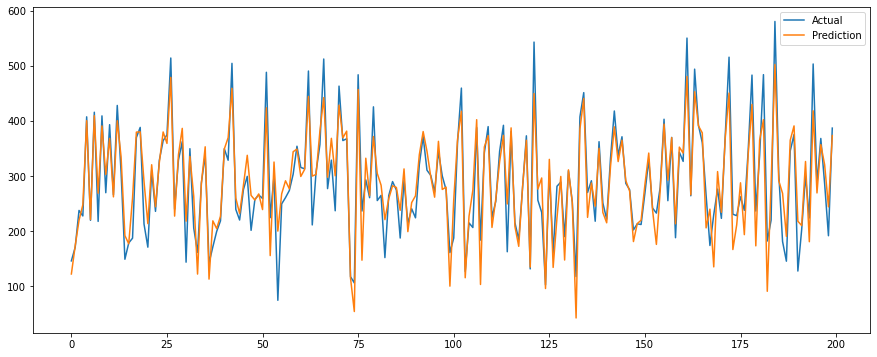

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Ridge Regression

Mean absolute percentage error (MAPE): 0.12
Root mean squared error (RMSE): 40.52
Coefficient of determination (R2): 0.83
20.93795896313435
[ 85.35391418  36.30351     95.4024713  157.82628247 158.27898654
  -1.6884305    0.99949141]


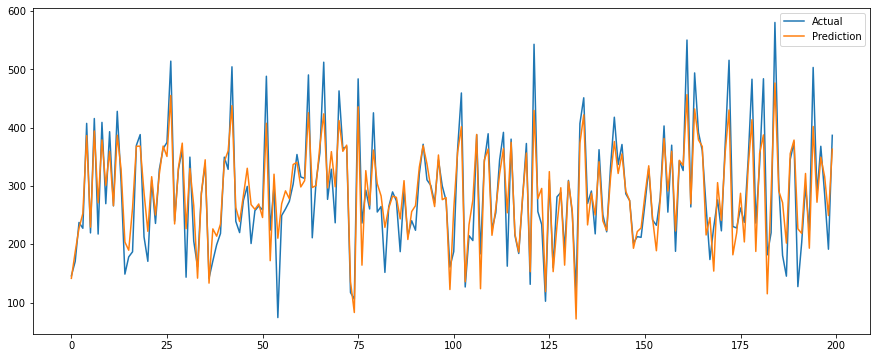

In [7]:
model = Ridge(alpha=10)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Lasso Regression

Mean absolute percentage error (MAPE): 0.17
Root mean squared error (RMSE): 53.19
Coefficient of determination (R2): 0.71
114.230164208367
[ 46.10088786   0.          51.42769013 123.38458286 124.97078632
  -0.          -0.        ]


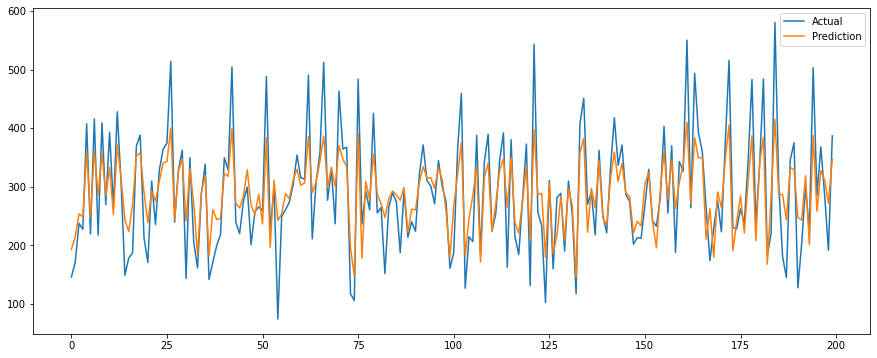

In [8]:
model = Lasso(alpha=5)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Elastic Net Regression

Mean absolute percentage error (MAPE): 0.15
Root mean squared error (RMSE): 50.94
Coefficient of determination (R2): 0.74
Weights of the model:
	63.57017
	27.21199
	67.95854
	115.55696
	115.75817
	-0.82590
	-0.33179
Intercept of the model: 92.69923



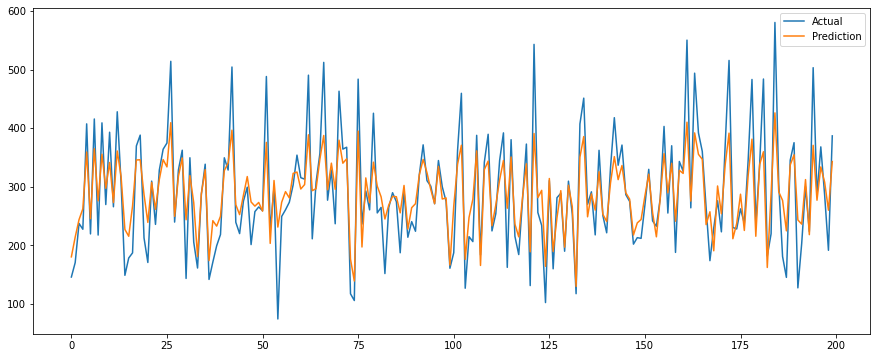

In [9]:
model =  ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))
print('Weights of the model:')
#print(model.coef_)
for i in model.coef_:
    print('\t%.5f' % i)
print('Intercept of the model: %.5f' % model.intercept_)
print()

plt.figure(figsize=(15, 6))
plt.plot(y_valid, label ='Actual')
plt.plot(y_valid_pred, label ='Prediction')
plt.legend()
plt.show()

# Orthogonal Matching Pursuit

Mean absolute percentage error (MAPE): 0.13
Root mean squared error (RMSE): 39.80
Coefficient of determination (R2): 0.84
3.291771331825487
[ 97.94323794   0.         111.04390803 178.82436828 179.90426383
   0.           0.        ]


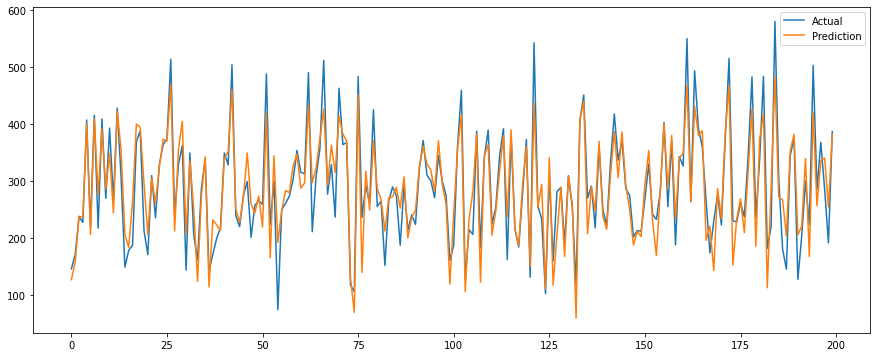

In [10]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=4)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Generalized Linear Model (GLM) / Tweedie Regressor

Mean absolute percentage error (MAPE): 0.11
Root mean squared error (RMSE): 31.98
Coefficient of determination (R2): 0.90
4.594463824450547
[ 0.32430675  0.13604967  0.36488303  0.60944643  0.60841183 -0.00360716
  0.0012477 ]


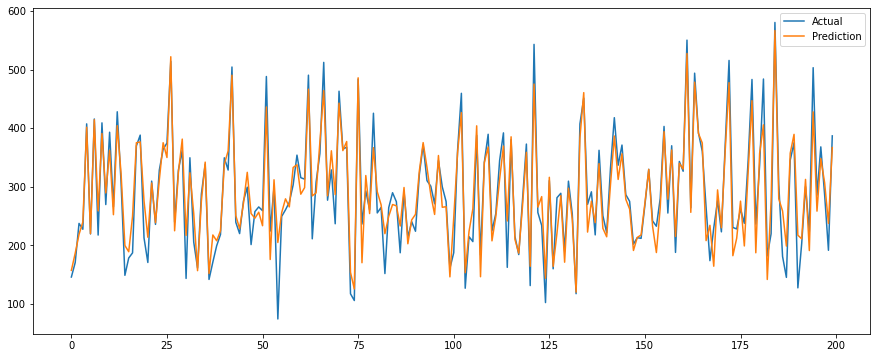

In [11]:
model = TweedieRegressor(power=1, alpha=1)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Stochastic Gradient Descent

Mean absolute percentage error (MAPE): 0.12
Root mean squared error (RMSE): 38.86
Coefficient of determination (R2): 0.85
[-7.45731761]
[ 94.00925203  38.43516601 107.17552091 176.83694675 177.82915448
  -4.2847315   -0.21000898]


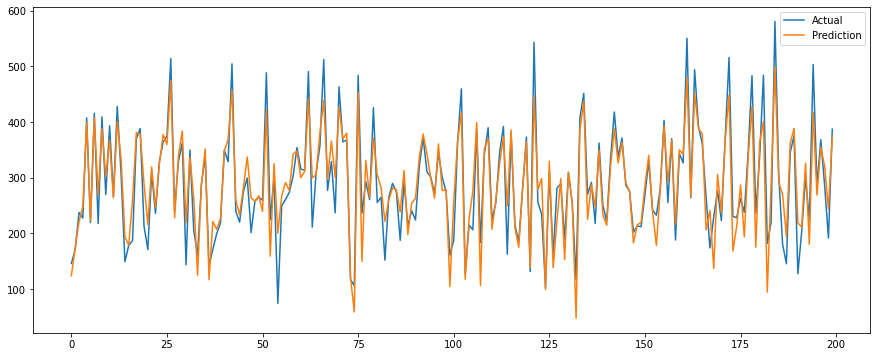

In [12]:
model = SGDRegressor()
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Polynomial Regression

## Dengan Pipeline

Mean absolute percentage error (MAPE): 0.01
Root mean squared error (RMSE): 3.29
Coefficient of determination (R2): 1.00


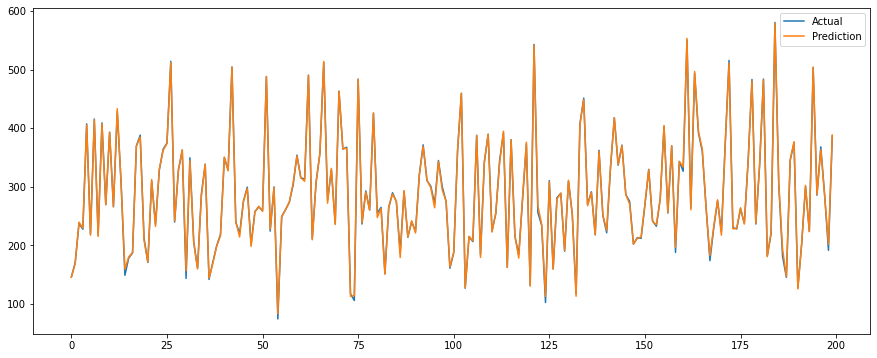

In [13]:
model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

## Tanpa Pipeline (Manual)

           x1        x2        x3        x4        x5        x6        x7
0    0.052632  0.105263  0.631579  0.421053  0.210526  0.947368  0.684211
1    0.210526  0.315789  0.631579  0.105263  0.789474  0.684211  0.842105
2    0.052632  0.052632  0.526316  0.526316  0.368421  0.526316  0.684211
3    0.368421  0.526316  0.894737  0.789474  1.000000  0.052632  0.526316
4    0.631579  0.052632  0.421053  0.368421  0.000000  1.000000  0.526316
..        ...       ...       ...       ...       ...       ...       ...
795  0.210526  0.315789  0.368421  0.736842  0.789474  0.105263  0.473684
796  0.526316  0.526316  0.315789  0.368421  0.947368  0.105263  0.210526
797  0.421053  0.789474  0.210526  1.000000  0.473684  0.368421  0.263158
798  0.000000  0.947368  0.842105  0.894737  0.947368  0.000000  0.210526
799  0.000000  0.947368  0.105263  0.421053  0.526316  0.000000  0.526316

[800 rows x 7 columns]
           x1        x2        x3        x4        x5        x6        x7  \
0    0.0526

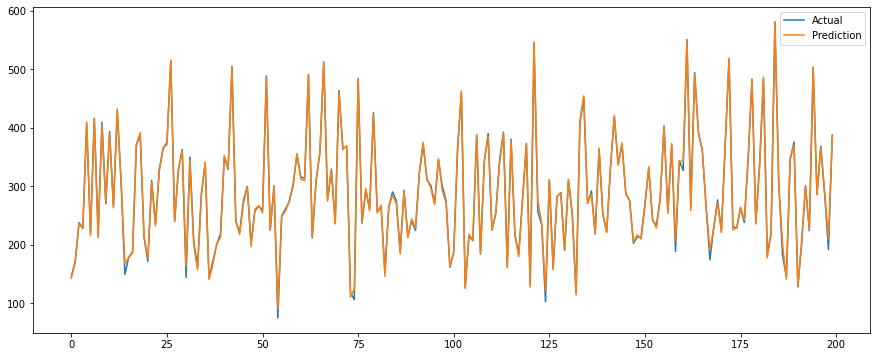

In [14]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)

X_train_poly = pd.DataFrame(X_train_poly)
X_valid_poly = pd.DataFrame(X_valid_poly)

X_train_poly.columns = poly.get_feature_names(X_train.columns)
X_valid_poly.columns = poly.get_feature_names(X_train.columns)

print(X_train)
print(X_train_poly)

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_valid_pred = model.predict(X_valid_poly)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

print(model.intercept_)
print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Support Vector Machines (SVM) for Regression

Mean absolute percentage error (MAPE): 0.07
Root mean squared error (RMSE): 21.20
Coefficient of determination (R2): 0.95


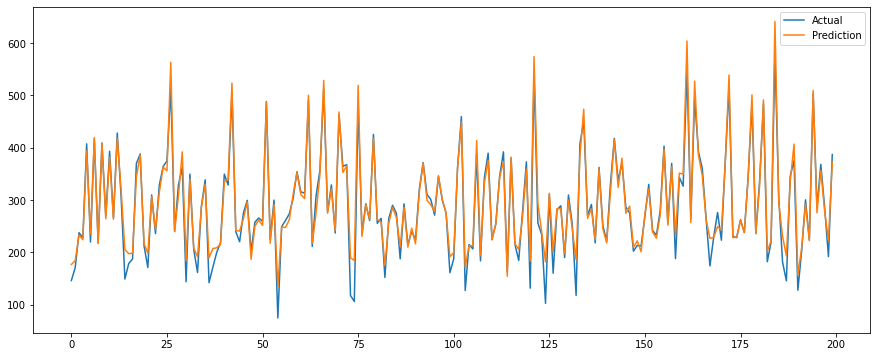

In [15]:
model = SVR(kernel='poly')
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Nearest Neighbors

Mean absolute percentage error (MAPE): 0.11
Root mean squared error (RMSE): 33.25
Coefficient of determination (R2): 0.89


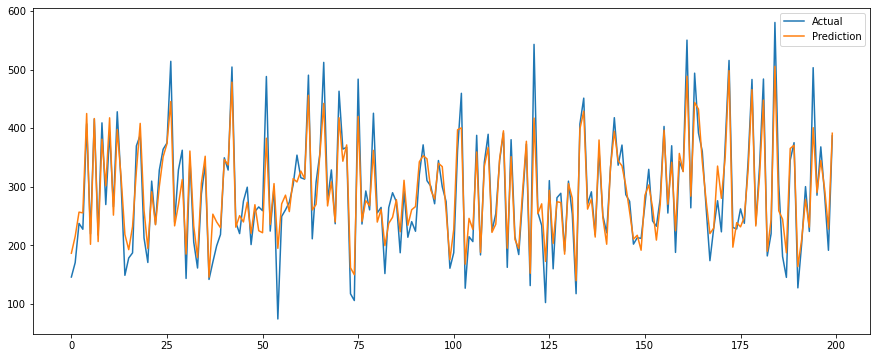

In [16]:
model = KNeighborsRegressor(n_neighbors=5, weights='distance')
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Decision Tree Regression

Mean absolute percentage error (MAPE): 0.11
Root mean squared error (RMSE): 36.77
Coefficient of determination (R2): 0.86


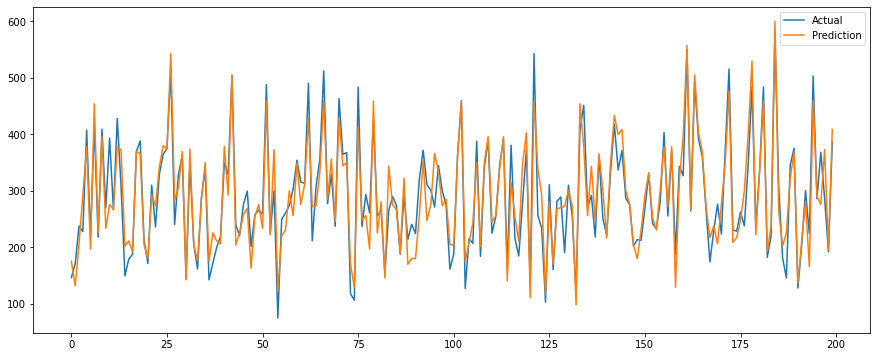

In [17]:
model = DecisionTreeRegressor(max_depth=9)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()

# Multi-layer Perceptron

C:\anaconda1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean absolute percentage error (MAPE): 0.02
Root mean squared error (RMSE): 6.39
Coefficient of determination (R2): 1.00


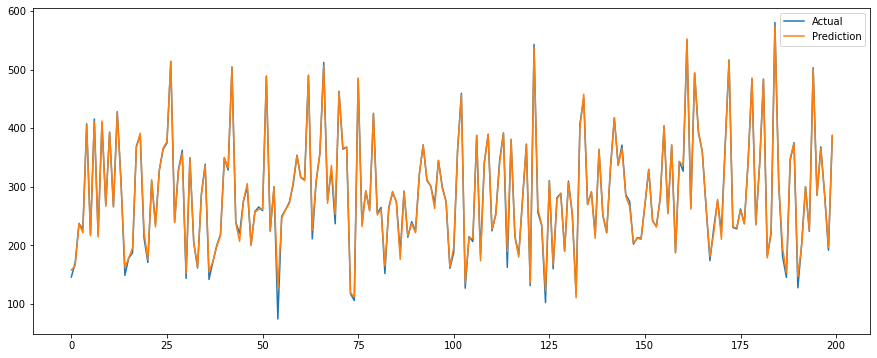

In [18]:
model = MLPRegressor(hidden_layer_sizes=(100), activation='logistic', solver='adam', max_iter=10000)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)

print('Mean absolute percentage error (MAPE): %.2f' % mean_absolute_percentage_error(y_valid, y_valid_pred))
print('Root mean squared error (RMSE): %.2f' % np.sqrt(mean_squared_error(y_valid, y_valid_pred)))
print('Coefficient of determination (R2): %.2f' % r2_score(y_valid, y_valid_pred))

#print(model.intercept_)
#print(model.coef_)

plt.figure(figsize=(15,6))
plt.plot(y_valid, label='Actual')
plt.plot(y_valid_pred, label='Prediction')
plt.legend()
plt.show()